<a href="https://colab.research.google.com/github/jeanfcf/unemployment-forecast-uk/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ARIMA


In [4]:
pip install pmdarima

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6 
from pmdarima.arima import auto_arima

In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')
df = pd.read_csv('/content/drive/MyDrive/Datasets/UK/UK-dataset.csv',parse_dates=['ANO'], index_col='ANO',date_parser=dateparse)
df = df.drop(['CASOS'], 1)
df = df.drop(['MORTES'], 1)
df = df.drop(['GDP'], 1)
df = df.drop(['LIBRA'], 1)
df = df.drop(['INFLACAO'], 1)
df = df.drop(['BANKRATE'], 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,DESEMPREGO
ANO,
1997-01-01,7.5
1997-02-01,7.3
1997-03-01,7.2
1997-04-01,7.2
1997-05-01,7.2


In [7]:
model = auto_arima(df,m=12,trace=3,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-574.014, Time=2.26 sec
First viable model found (-574.014)
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-507.221, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-548.851, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-532.859, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-506.542, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-571.169, Time=1.58 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-569.829, Time=1.44 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-569.198, Time=5.31 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-570.184, Time=4.73 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-565.781, Time=0.91 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-571.728, Time=3.65 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-569.887, Time=5.38 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-569.981, Time=5.92 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-576.04

In [8]:
train = df.loc['1997-01-01':'2016-12-01']
test = df.loc['2017-01-01':]



In [9]:
model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
forecast = model.predict(n_periods=51)

In [11]:
future = pd.DataFrame(forecast,index=test.index,columns=['#DESEMPREGO'])

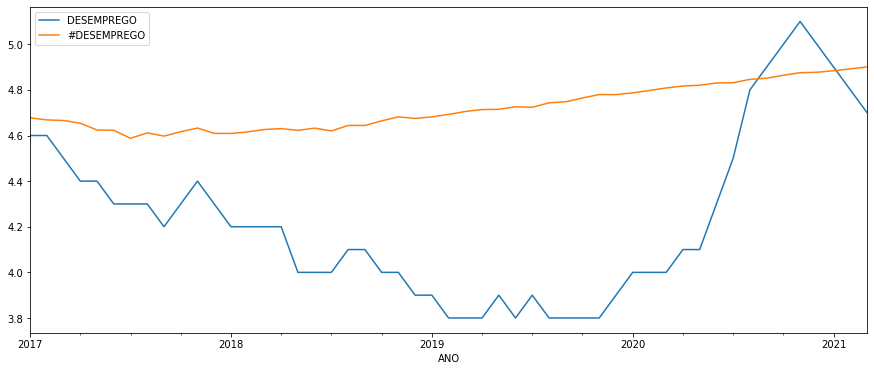

In [12]:
pd.concat([test,future],axis=1).plot()

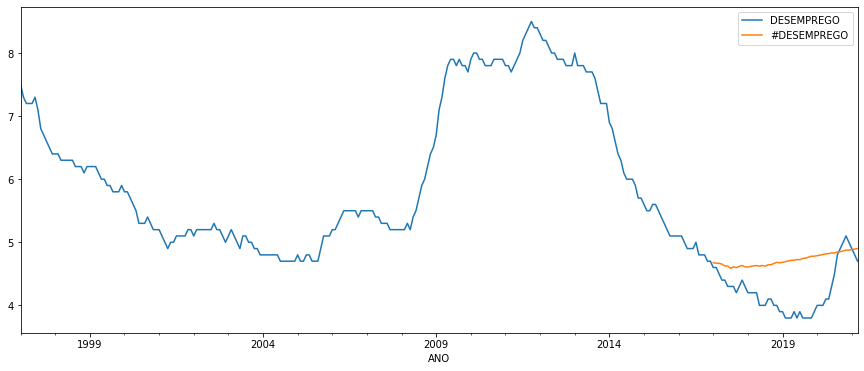

In [13]:
pd.concat([df,future],axis=1).plot()